## 음식점의 종류, 가격, 위치, 인구 분석

In [1]:
import numpy as np
import pandas as pd

In [2]:
restaurant_df = pd.read_csv('대전광역시 대덕구_일반음식점_20210101.csv', header = 0, engine = 'python', encoding='ANSI')
restaurant_price_df = pd.read_csv('대전광역시 대덕구_개인서비스가격정보_20210630.csv', header = 0, engine = 'python', encoding='ANSI')
people_df = pd.read_csv('대전광역시 대덕구_주민등록인구현황_20210630.csv', header = 0, engine = 'python', encoding='ANSI')

In [3]:
restaurant_df.head()

,업소명,업종명,업태명,소재지(도로명),소재지(지번),인허가일자,데이터기준일자
0,영화반점,일반음식점,중국식,"대전광역시 대덕구 신탄진동로23번길 46 (신탄진동,(1층))",대전광역시 대덕구 신탄진동 139번지 17호 (1층),1971-03-29,2021-01-01
1,대덕식당,일반음식점,한식,대전광역시 대덕구 신탄진로738번길 1 (신탄진동),대전광역시 대덕구 신탄진동 295번지 14호,1976-11-15,2021-01-01
2,홍성식당,일반음식점,한식,"대전광역시 대덕구 신탄진로839번길 10, 1층 (신탄진동)",대전광역시 대덕구 신탄진동 114번지 14호 1층,1977-01-31,2021-01-01
3,우리식당,일반음식점,한식,대전광역시 대덕구 대화1길 6 (대화동),대전광역시 대덕구 대화동 35번지 6호,1977-06-21,2021-01-01
4,등나무집,일반음식점,한식,대전광역시 대덕구 대화로 53 (대화동),대전광역시 대덕구 대화동 40번지 67호,1978-11-24,2021-01-01


In [4]:
restaurant_price_df.head()

,품목,조사기준,구평균가격,오정동,대화동,회덕동,비래동,송촌동,중리동,"법1,2동",신탄진동,"석봉,목상동",덕암동,데이터기준일자
0,설렁탕,1그릇(대중식당),6800.0,6000.0,NaN,NaN,NaN,8000.0,7000.0,6000.0,NaN,7000,NaN,2021-06-30
1,냉면,1그릇(대중식당),6850.0,8500.0,5000.0,7000.0,7000.0,8000.0,6000.0,6000.0,7000.0,7000,7000.0,2021-06-30
2,비빔밥,1그릇(대중식당),6000.0,6000.0,6000.0,NaN,NaN,7000.0,4500.0,6000.0,7000.0,6000,5500.0,2021-06-30
3,갈비탕,1그릇(대중식당),9400.0,10000.0,6000.0,9000.0,10000.0,12000.0,8000.0,9000.0,10000.0,10000,10000.0,2021-06-30
4,삼계탕,1그릇(대중식당),11300.0,12000.0,10000.0,10000.0,12000.0,12000.0,12000.0,10000.0,12000.0,11000,12000.0,2021-06-30


In [5]:
address_dong=['대덕구','오정동','대화동','회덕동','비래동','송촌동','중리동','법1동','법2동','신탄진동','석봉동','덕암동','목상동']

In [6]:
address_count_dong=[0 for i in range(13)]

def Address_Count(dong):
    for i in range(0, 13):
        if(dong == address_dong[i]):
            address_count_dong[i]=address_count_dong[i]+1
            break

def Address_dong(list1):
    address=[]
    re_address=[]
    for temp in list1:
        #print('전처리전',temp)
        address=temp.split(' ')
        #print('전처리후',address[2])
        re_address.append(address[2])
        Address_Count(address[2])
    #print(re_address)
    return(re_address)
            
restaurant_df['주소(동)']=Address_dong(restaurant_df['소재지(지번)'])
address_count_dong[0]= sum(address_count_dong)
print(address_count_dong)

[2041, 305, 96, 0, 187, 368, 474, 0, 0, 246, 175, 95, 95]


In [7]:
people_df['식당수']=pd.DataFrame(address_count_dong)
people_df = people_df.drop(['구분','데이터기준일자'], axis = 1, inplace = False)
people_df.head()

,세대수,인구수(남),인구수(여),10대이하,20대,30대,40대,50대,60대,70대,65세이상,식당수
0,89155,86005,78753,26994,24313,19798,26588,33251,25794,18422,28698,2041
1,7741,6794,7526,1596,2274,1538,1918,2701,2642,1866,2935,305
2,3757,3345,3535,768,801,821,1054,1329,1350,979,1562,96
3,6368,6141,5699,1626,1440,1227,1739,2333,2301,1843,2804,0
4,8183,8215,7002,2564,2248,1581,2510,3162,2532,1801,2846,187


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#X,Y 분활하기
Y=people_df['식당수']
X=people_df.drop(['식당수'], axis=1,inplace=False)

#훈련용 데이터와 평가용 데이터 분활하기
X_trian, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=156)

#선형 회귀 분석: 모델 생성
lr=LinearRegression()

lr.fit(X_trian, Y_train)

Y_predict=lr.predict(X_test)


In [9]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE : 265894.069, RMSE : 515.649
R^2(Variance score) : 0.636


In [10]:
print('Y 절편 값: ', lr.intercept_)
print('회귀 계수 값: ', np.round(lr.coef_, 1))

Y 절편 값:  -76.80880965146548
회귀 계수 값:  [ 0.1 -0.1  0.1  0.1 -0.1 -0.2 -0.  -0.   0.4 -0.3 -0.2]


In [11]:
coef = pd.Series(data = np.round(lr.coef_, 2), index=X.columns)
coef.sort_values(ascending = False)

60대       0.43
인구수(여)    0.15
10대이하     0.12
세대수       0.06
40대      -0.01
50대      -0.02
인구수(남)   -0.11
20대      -0.14
30대      -0.18
65세이상    -0.21
70대      -0.26
dtype: float64

In [12]:
people_df.head()

,세대수,인구수(남),인구수(여),10대이하,20대,30대,40대,50대,60대,70대,65세이상,식당수
0,89155,86005,78753,26994,24313,19798,26588,33251,25794,18422,28698,2041
1,7741,6794,7526,1596,2274,1538,1918,2701,2642,1866,2935,305
2,3757,3345,3535,768,801,821,1054,1329,1350,979,1562,96
3,6368,6141,5699,1626,1440,1227,1739,2333,2301,1843,2804,0
4,8183,8215,7002,2564,2248,1581,2510,3162,2532,1801,2846,187


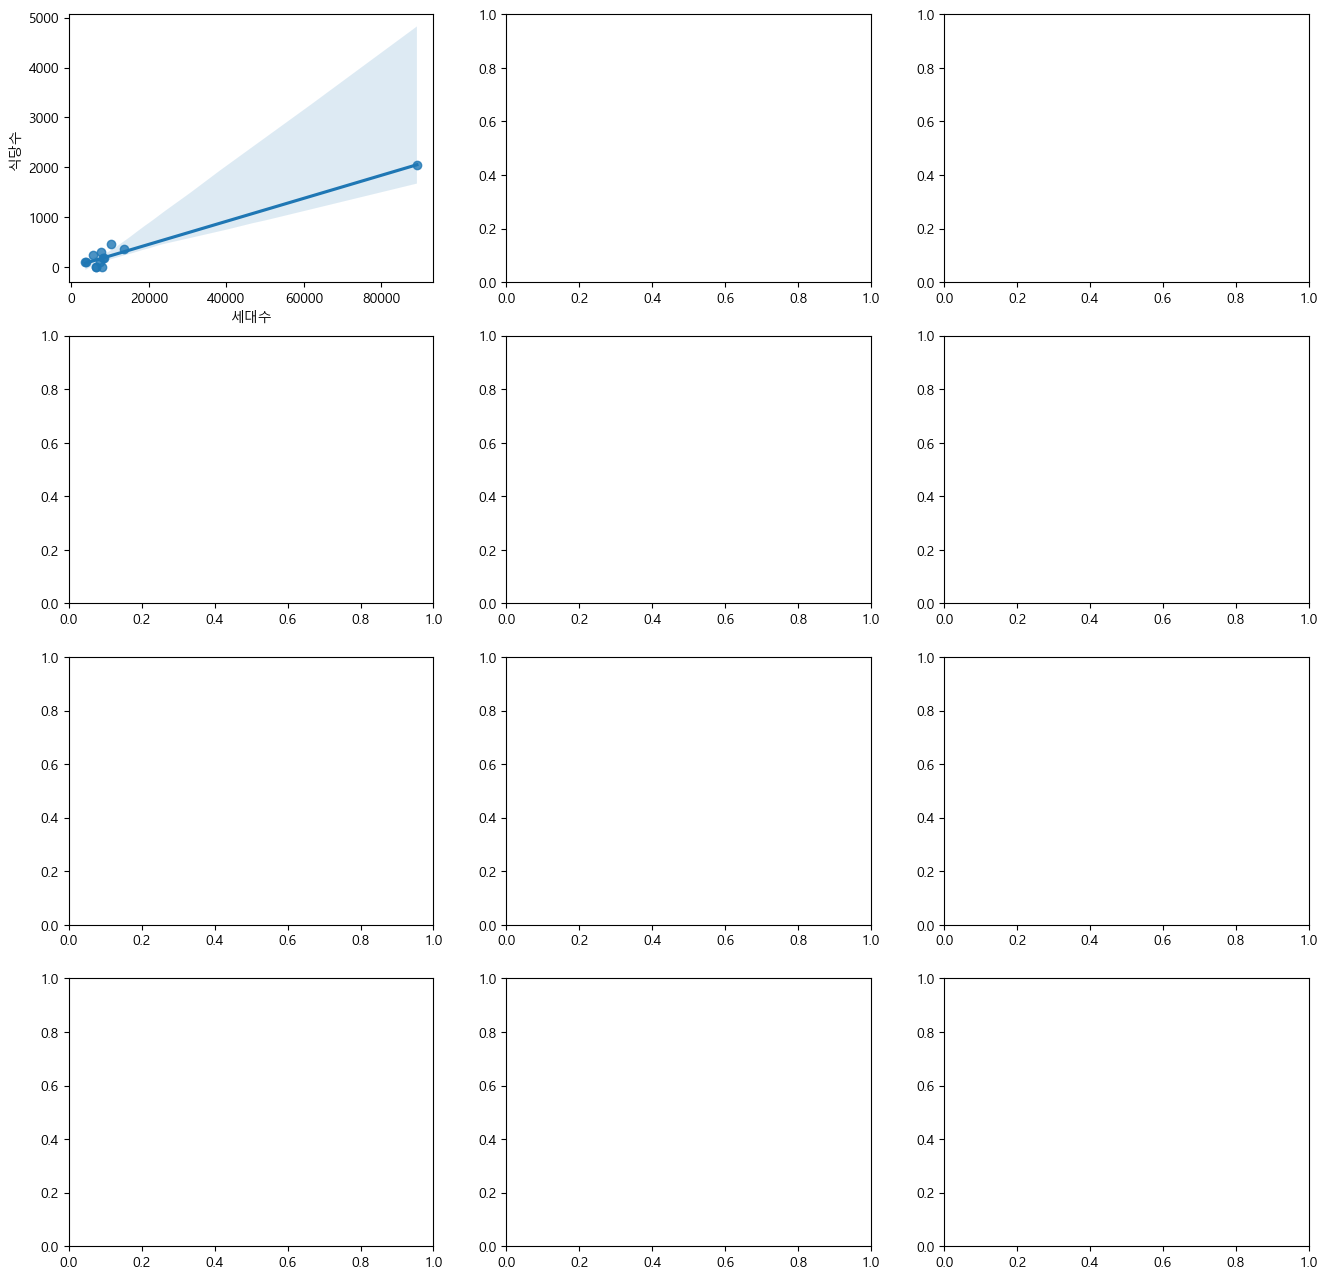

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize = (16, 16), ncols = 3, nrows = 4)
x_features = ['세대수', '인구수(남)', '인구수(여)', '10대이하', '20대', '30대', '40대', '50대', '60대', '70대', '65세이상']
for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    plt.rc('font', family='Malgun Gothic')
    plt.rc('axes', unicode_minus=False)
    plt.show(sns.regplot(x = feature, y = '식당수', data = people_df, ax = axs[row][col]))